<h1 style="color:darkmagenta; font-family:Cursive">
    <center>
        <b>Exploratory Data Analysis (EDA)
        <b>on
        <b>Data Science Job Salary
    </center>
</h1>

## <div><p style="color:#b50264; font-family:Cursive"><b>🎯 Notebook Goal</p></div>


1. **Explore every feature** in the dataset. 📊
2. 

## <div><p style="color:#b50264; font-family:Cursive"><b>📁 About Dataset</p></div>

> Dataset Link: [**Data Science Job Salaries**](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)
>
> This dataset contains **<span style="color:green">11 columns</span>**.

1. **work_year**: The year the salary was paid.
2. **experience_level**: The experience level in the job during the year with the following possible values -

                            1. EN = Entry-level / Junior
                            2. MI = Mid-level / Intermediate
                            3. SE = Senior-level / Expert
                            4. EX = Executive-level / Director

3. **employment_type**: The type of employment for the role -

                            1. PT = Part-time
                            2. FT = Full-time
                            3. CT = Contract
                            4. FL = Freelance

4. **job_title**: The role worked in during the year.
5. **salary**: The total gross salary amount paid.
6. **salary_currency**: The currency of the salary paid as an [ISO 4217 currency code](https://en.wikipedia.org/wiki/ISO_4217)
7. **salary_in_usd**: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
8. **employee_residence**: Employee's primary country of residence in during the work year as an [ISO 3166 country code](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes#Current_ISO_3166_country_codes)(Alpha-2 code).
9. **remote_ratio**: The overall amount of work done remotely, possible values are as follows -

                            1. 0   = No remote work (less than 20%)
                            2. 50  = Partially remote
                            3. 100 = Fully remote (more than 80%)

10. **company_location**: The country of the employer's main office or contracting branch as an [ISO 3166 country code](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes#Current_ISO_3166_country_codes)(Alpha-2 code).

11. **company_size**: The average number of people that worked for the company during the year -

                            1. S = less than 50 employees (small)
                            2. M = 50 to 250 employees (medium)
                            3. L = more than 250 employees (large)


## <div><p style="color:#b50264; font-family:Cursive"><b>🏷️ Table of Contents</p></div>
<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">

   1. [Import Necessary Libraries](#1)
   2. [Dataset](#2)
      - 2.1. [Getting Dataset](#2.1)
      - 2.2. [Knowing Dataset](#2.2)
      - 2.3. [Replacing some of the values to understand the dataset clearly](#2.3)
   3. [Univariate Analysis](#3)
      - 3.1. [Categorical Columns](#3.1)
         - 3.1.1 [Work Year](#3.1.1)
         - 3.1.2 [Experience Level](#3.1.2)
         - 3.1.3 [Employment Type](#3.1.3)
         - 3.1.4 [Job Titles](#3.1.4)
         - 3.1.5 [Employee Residence](#3.1.5)
         - 3.1.6 [Remote Rate](#3.1.6)
         - 3.1.7 [Company Location](#3.1.7)
         - 3.1.8 [Company Size](#3.1.8)
      - 3.2. [Numerical Columns](#3.2)
         - 3.2.1 [Salary in USD](#3.2.1)

<a id="1"></a>
## <div><p style="color:darkmagenta; font-family:Cursive"><b>1. Import Necessary Libraries</p></div>

In [1]:
# data
import pandas as pd
import numpy as np
import country_converter as coco

# visualization
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
from wordcloud import WordCloud

# nltk
import nltk

# style
from numpy import unique
%matplotlib inline

<a id="2"></a>
## <div><p style="color:darkmagenta; font-family:Cursive"><b>2. Dataset</p></div>

<a id="2.1"></a>
### <div><p style="color:#b50264; font-family:Cursive"><b>2.1. Getting Dataset</p></div>

In [2]:
# read data and create DataFrame
df = pd.read_csv("../data_given/ds_salaries.csv", index_col=0)

<a id="2.2"></a>
### <div><p style="color:#b50264; font-family:Cursive"><b>2.2. Knowing Dataset</p></div>

In [3]:
# shape of the dataset
print("Shape of the dataset: ", df.shape)
# show first 5 columns
print("First 5 columns of the dataset: ")
df.head()

Shape of the dataset:  (607, 11)
First 5 columns of the dataset: 


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<div style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray; border-left: 2px dotted gray;border-right: 2px dotted gray">
    <h4>Note</h4>
    <p style="text-align:center;">
        The dataset has 11 columns with 607 rows.
    </p>
</div>

In [4]:
# check missing values in the columns
print(f"Total NULL values: {df.isnull().sum().sum()}\n")
print("Individual columns missing values: ")
print(df.isnull().sum())

Total NULL values: 0

Individual columns missing values: 
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


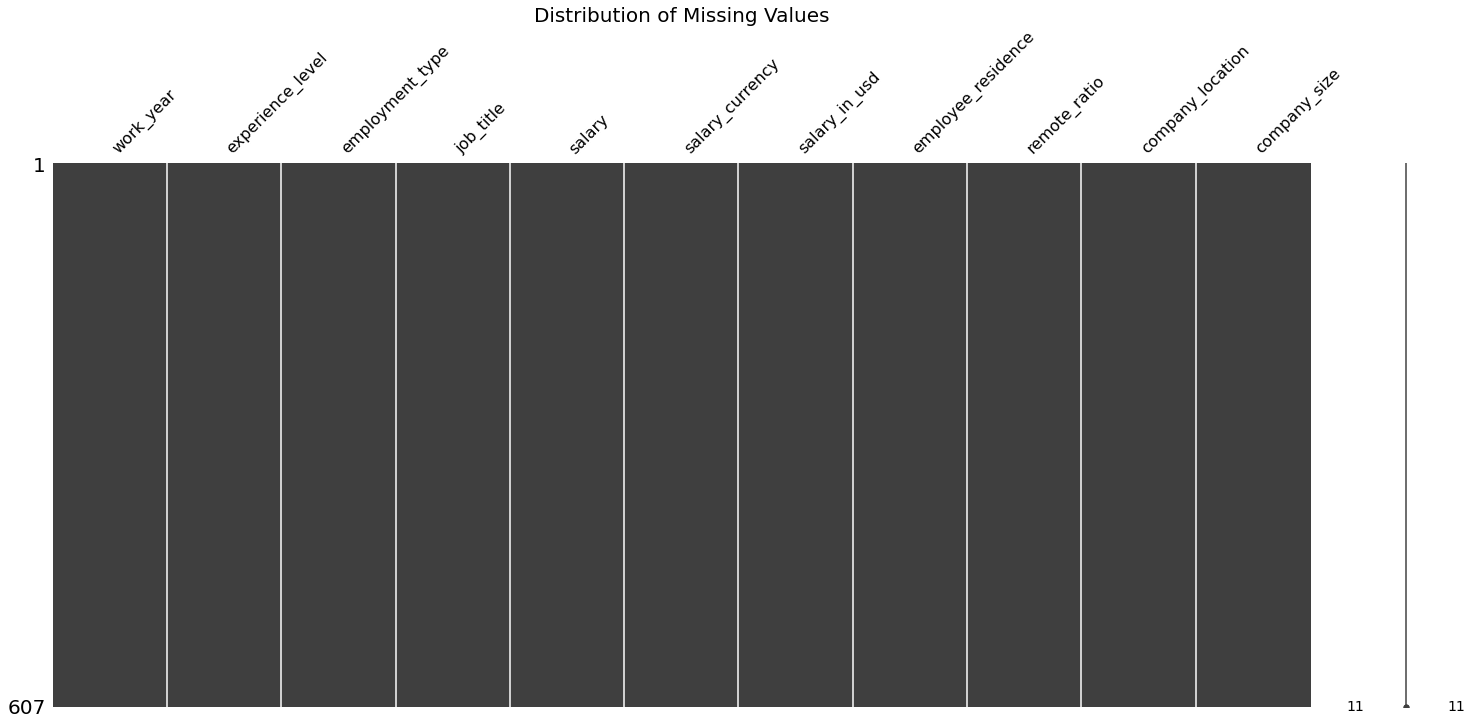

<Figure size 360x360 with 0 Axes>

In [5]:
# visualization of missing values
msno.matrix(df)
plt.title('Distribution of Missing Values', fontsize=20)
plt.figure(figsize=(5,5))
plt.show()

<div style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray; border-left: 2px dotted gray;border-right: 2px dotted gray">
    <h4>Note</h4>
    <p style="text-align:center;">
        There's <span style='font-weight: bold'>no missing</span> values in the dataset.
    </p>
</div>

In [6]:
# data type of all the columns
print("Data type of all the columns: ")
df.dtypes

Data type of all the columns: 


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [7]:
# unique values in the dataset
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

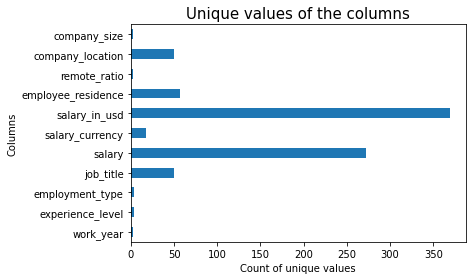

<Figure size 360x360 with 0 Axes>

In [8]:
df.nunique().plot.barh()
plt.title('Unique values of the columns', fontsize=15)
plt.ylabel('Columns')
plt.xlabel('Count of unique values')
plt.figure(figsize=(5,5))
plt.show()

In [9]:
categorical_columns = []
numerical_columns = []

for col in df.columns:
    categorical_columns.append(col) if df[col].nunique() < 60 else numerical_columns.append(col)

print("Number of Numerical Columns: ", len(numerical_columns))
print("Numerical Columns: ", numerical_columns)
print("\nNumber of Categorical Columns: ", len(categorical_columns))
print("Categorical Columns: ", categorical_columns)

Number of Numerical Columns:  2
Numerical Columns:  ['salary', 'salary_in_usd']

Number of Categorical Columns:  9
Categorical Columns:  ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


<div style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray; border-left: 2px dotted gray;border-right: 2px dotted gray">
    <h4>Note</h4>
    <p style="text-align:center;">
        - <span style='font-weight: bold'>Total numerical columns is 2:</span> salary, salary_in_usd.
        <br>
        <br>
        - <span style='font-weight: bold'>Total categorical columns is 9:</span> work_year, experience_level, employment_type, job_title, salary_currency, employee_residence, remote_ratio, company_location, company_size.
    </p>
</div>

<a id="2.3"></a>
### <div><p style="color:#b50264; font-family:Cursive"><b>2.3. Replacing some of the values to understand the dataset clearly</p></div>

In [10]:
# Converting country codes to country names of employee_residence
residence_country_list = coco.convert(names=df['employee_residence'], to="name_short")
df['employee_residence'] = residence_country_list

In [11]:
print("First 5 employee residence:")
df['employee_residence'][:5]

First 5 employee residence:


0           Germany
1             Japan
2    United Kingdom
3          Honduras
4     United States
Name: employee_residence, dtype: object

In [12]:
# Converting country codes to country names of company_location
company_country_list = coco.convert(names=df['company_location'], to="name_short")
df['company_location'] = company_country_list

In [13]:
print("First 5 company location:")
df['company_location'][:5]

First 5 company location:


0           Germany
1             Japan
2    United Kingdom
3          Honduras
4     United States
Name: company_location, dtype: object

In [14]:
# Replacing remote_ratio into understandable formate
df['remote_ratio'].replace([100,50,0], ['Remote', 'Hybrid' ,'On-site'], inplace = True)

In [15]:
print("First 5 remote:")
df['remote_ratio'][:5]

First 5 remote:


0    On-site
1    On-site
2     Hybrid
3    On-site
4     Hybrid
Name: remote_ratio, dtype: object

In [16]:
# Replacing experience_level into understandable formate
df['experience_level'].replace(['EN', 'MI', 'SE', 'EX'],
                               ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director'],
                               inplace = True)

In [17]:
print("First 5 experience level:")
df['experience_level'][:5]

First 5 experience level:


0    Mid-level/Intermediate
1       Senior-level/Expert
2       Senior-level/Expert
3    Mid-level/Intermediate
4       Senior-level/Expert
Name: experience_level, dtype: object

In [18]:
# Replacing employment_type into understandable formate
df['employment_type'].replace(['PT', 'FT', 'CT', 'FL'], ['Part-time', 'Full-time' ,'Contract', 'Freelance'], inplace = True)

In [19]:
print("First 5 employment type:")
df['employment_type'][:5]

First 5 employment type:


0    Full-time
1    Full-time
2    Full-time
3    Full-time
4    Full-time
Name: employment_type, dtype: object

In [20]:
# Replacing company_size into understandable formate
df['company_size'].replace(['S', 'M', 'L'], ['Small', 'Medium' ,'Large'], inplace = True)

In [21]:
print("First 5 company size:")
df['company_size'][:5]

First 5 company size:


0     Large
1     Small
2    Medium
3     Small
4     Large
Name: company_size, dtype: object

In [22]:
# Now, the updated dataset - first 5 rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level/Intermediate,Full-time,Data Scientist,70000,EUR,79833,Germany,On-site,Germany,Large
1,2020,Senior-level/Expert,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,On-site,Japan,Small
2,2020,Senior-level/Expert,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom,Hybrid,United Kingdom,Medium
3,2020,Mid-level/Intermediate,Full-time,Product Data Analyst,20000,USD,20000,Honduras,On-site,Honduras,Small
4,2020,Senior-level/Expert,Full-time,Machine Learning Engineer,150000,USD,150000,United States,Hybrid,United States,Large


<a id="3"></a>
## <div><p style="color:darkmagenta; font-family:Cursive"><b>3. Univariate Analysis</p></div>

<a id="3.1"></a>
### <div><p style="color:#b50264; font-family:Cursive"><b>3.1. Categorical Columns</p></div>

<a id="3.1.1"></a>
#### <div><p style="color:MediumVioletRed; font-family:Cursive"><b>3.1.1. Work Year</p></div>

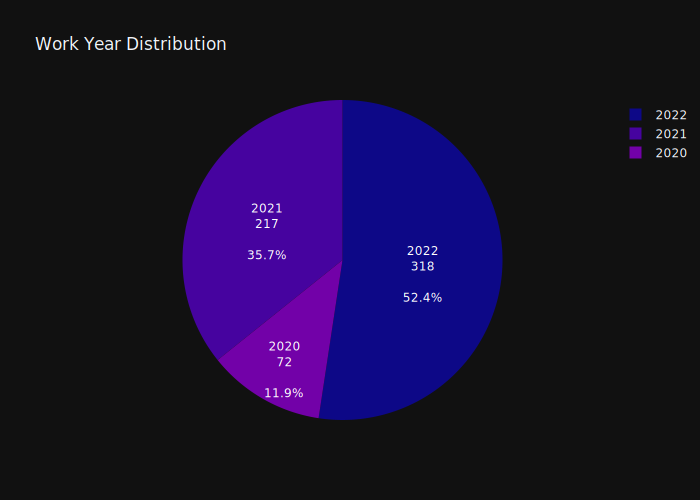

In [23]:
work_year = df["work_year"].value_counts()

fig = px.pie(values=work_year.values,
             names=work_year.index,
             color_discrete_sequence=px.colors.sequential.Plasma,
             title="Work Year Distribution",
             template="plotly_dark"
             )
fig.update_traces(textinfo='label+value+percent')

fig.show('svg')

<div style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray; border-left: 2px dotted gray;border-right: 2px dotted gray">
    <h4>Note</h4>
    <p style="text-align:center;">
        More than half of the Data Science jobs were in 2022 (<span style='font-weight: bold'>52.4%</span>). 2021 was the second most which is <span style='font-weight: bold'>35.7%</span> and 2020 had <span style='font-weight: bold'>11.9%</span>.
    </p>
</div>

<a id="3.1.2"></a>
#### <div><p style="color:MediumVioletRed; font-family:Cursive"><b>3.1.2. Experience Level</p></div>

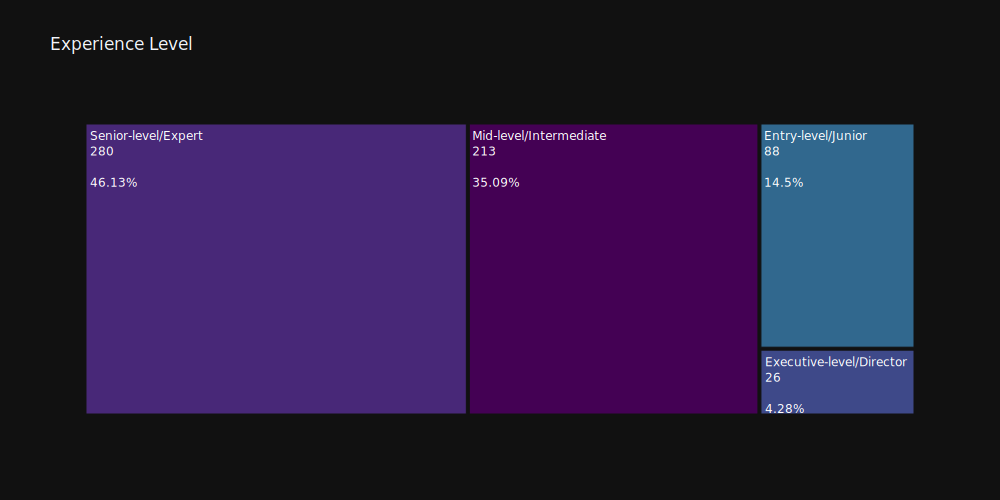

In [24]:
experience_level = df["experience_level"].value_counts()

fig = px.treemap(experience_level,
                 path=[experience_level.index],
                 values=experience_level.values,
                 title="Experience Level",
                 color=experience_level.index,
                 color_discrete_sequence=px.colors.sequential.Viridis,
                 template="plotly_dark",
                 width=1000)

percents = list(np.round((100*experience_level.values / sum(experience_level.values)).tolist(), 2))
fig.data[0].customdata = [35.09, 46.13, 4.28 , 14.5]
fig.data[0].texttemplate = "%{label}<br>%{value}<br>%{customdata}%"


fig.show('svg')

<div style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray; border-left: 2px dotted gray;border-right: 2px dotted gray">
    <h4>Note</h4>
    <p style="text-align:center;">
        Senior-level/Expert accounts for highest <span style='font-weight: bold'>46.13%</span>, and Mid-level/Intermediate ranked the next (<span style='font-weight: bold'>35.09%</span>). Entry-level/Junior is <span style='font-weight: bold'>14.5%</span>, and there's only <span style='font-weight: bold'>4.28%</span> of Executive-level/Director.
    </p>
</div>

<a id="3.1.3"></a>
#### <div><p style="color:MediumVioletRed; font-family:Cursive"><b>3.1.3. Employment Type</p></div>

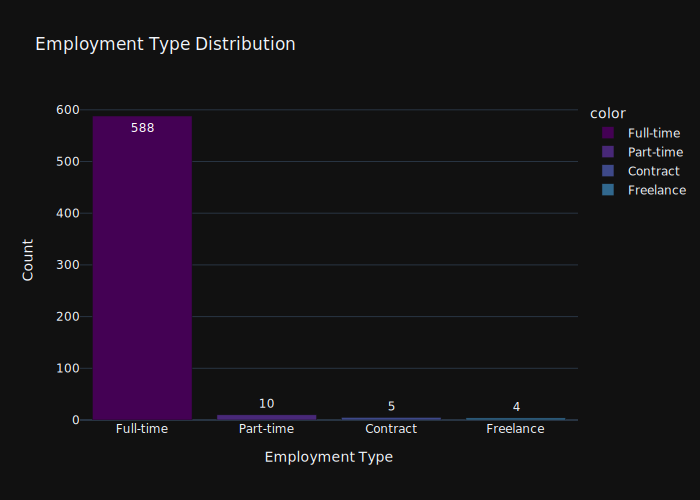

In [25]:
employment_type = df["employment_type"].value_counts()

fig = px.bar(x=employment_type.index,
             y=employment_type.values,
             color=employment_type.index,
             color_discrete_sequence=px.colors.sequential.Viridis,
             template="plotly_dark",
             text=employment_type.values,
             title="Employment Type Distribution")

fig.update_layout(xaxis_title="Employment Type",
                  yaxis_title="Count")

fig.show('svg')

<div style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray; border-left: 2px dotted gray;border-right: 2px dotted gray">
    <h4>Note</h4>
    <p style="text-align:center;">
        Most of the employee types are <span style='font-weight: bold'>Full-time</span>.
    </p>
</div>

<a id="3.1.4"></a>
#### <div><p style="color:MediumVioletRed; font-family:Cursive"><b>3.1.4. Job Titles</p></div>

In [26]:
# Total job titles count
print("Total job titles: ", df['job_title'].value_counts().size)

Total job titles:  50


<div><p style="color:#700202; font-family:Cursive"><b>Word Cloud of job titles</p></div>

In [27]:
# Words frequency
def frequency_of_word(word_list):
    frequency_distribution = nltk.FreqDist(word_list)
    df_frequency = pd.DataFrame.from_dict(frequency_distribution, orient='index')

    df_frequency.columns = ["Frequency"]
    df_frequency.index.name = "Term"

    df_frequency = df_frequency.sort_values(by=["Frequency"], ascending=False)
    df_frequency = df_frequency.reset_index()
    return df_frequency

In [28]:
# Word cloud
def word_cloud(data, background_color, color_map, title):
    plt.figure(figsize = (20, 15))
    wc = WordCloud(width = 1200,
                   height = 600,
                   max_words = 50,
                   colormap = color_map,
                   max_font_size = 150,
                   random_state = 0,
                   background_color = background_color).generate_from_frequencies(data)
    plt.imshow(wc)
    plt.title(title, fontsize = 20)
    plt.axis("off")
    plt.show('svg')

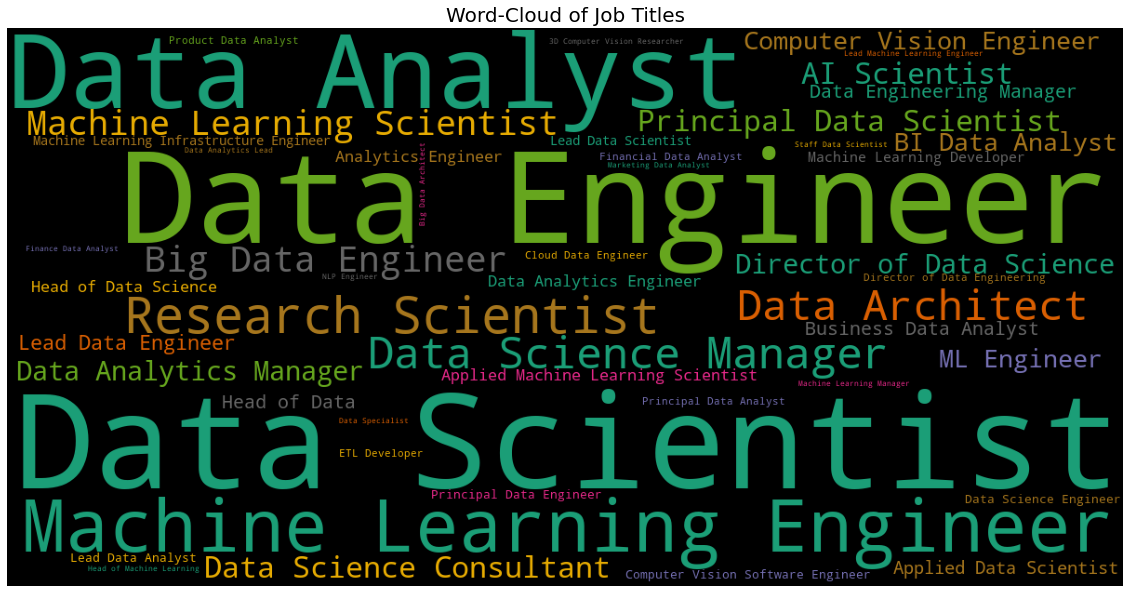

In [29]:
freq_word = frequency_of_word(df['job_title'].values.tolist())
data = freq_word.set_index("Term").to_dict()["Frequency"]

word_cloud(data, 'black', 'Dark2_r', 'Word-Cloud of Job Titles')

<div><p style="color:#700202; font-family:Cursive"><b>Top 10 job titles</p></div>

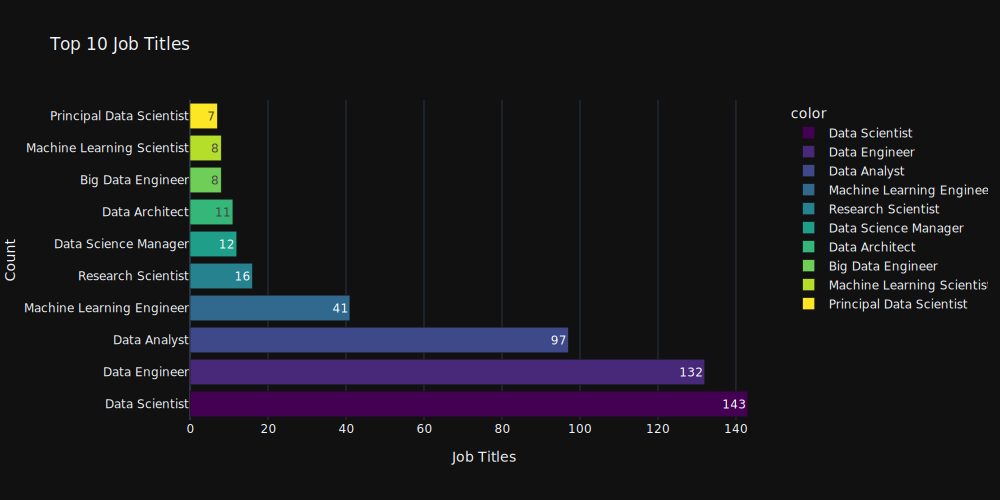

In [30]:
# Top 10 job titles in the data science jobs
top_10_job_title = df["job_title"].value_counts()[:10]

fig = px.bar(x=top_10_job_title.values,
             y=top_10_job_title.index,
             color=top_10_job_title.index,
             color_discrete_sequence=px.colors.sequential.Viridis,
             text=top_10_job_title.values,
             title="Top 10 Job Titles",
             template="plotly_dark",
             width=1000)

fig.update_layout(xaxis_title="Job Titles",
                  yaxis_title="Count")

fig.show('svg')

<div style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray; border-left: 2px dotted gray;border-right: 2px dotted gray">
    <h4>Note</h4>
    <p style="text-align:center;">
        <span style='font-weight: bold'>Data Scientist</span>, <span style='font-weight: bold'>Data Engineer</span>, and <span style='font-weight: bold'>Data Analyst</span> are the top 3 ranked job titles.
    </p>
</div>

<a id="3.1.5"></a>
#### <div><p style="color:MediumVioletRed; font-family:Cursive"><b>3.1.5. Employee Residence</p></div>

<div><p style="color:#700202; font-family:Cursive"><b>Choropleth map</p></div>

In [31]:
# Convert country name into ISO code
converted_country = coco.convert(names = df["employee_residence"], to = "ISO3")
converted_country_df = pd.DataFrame({"converted_country": converted_country})
converted_country_df.head(3)

,converted_country
0,DEU
1,JPN
2,GBR


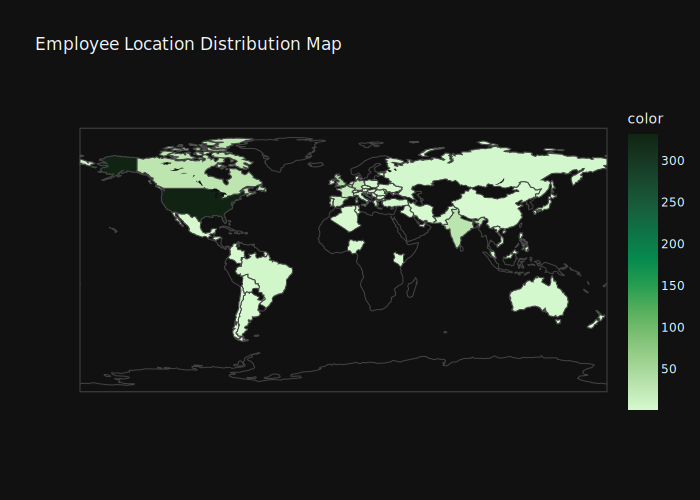

In [32]:
# Choropleth map
residence = converted_country_df["converted_country"].value_counts()

fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale = px.colors.sequential.algae,
                    hover_name = residence.values,
                    template = "plotly_dark",
                    title = "Employee Location Distribution Map")

fig.show('svg')

<div><p style="color:#700202; font-family:Cursive"><b>Employee Residence Bar Plot</p></div>

In [33]:
top_10_employee_residence = df["employee_residence"].value_counts()[:10]

fig = px.bar(y = top_10_employee_residence.values,
             x = top_10_employee_residence.index,
             color = top_10_employee_residence.index,
             color_discrete_sequence = px.colors.sequential.Viridis,
             text = top_10_employee_residence.values,
             title = "Top 10 Residence of Employees",
             template = "plotly_dark")

fig.update_layout(xaxis_title="Location of Employee",
                  yaxis_title="Count")

fig.show()

<div style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray; border-left: 2px dotted gray;border-right: 2px dotted gray">
    <h4>Note</h4>
    <p style="text-align:center;">
        Most of the employees are from <span style='font-weight: bold'>United States</span> (<span style='font-weight: bold; color: purple'>332</span>), and <span style='font-weight: bold'>United Kingdom</span>, <span style='font-weight: bold'>India</span> ranked the next.
    </p>
</div>